# Pyber analysis
The objective of this analysis is to understand how the driver market performes in the different city types (urban, suburban and rural). This was achived by comparing and plotting the relationship between:
* Average Fare ($) Per City

* Total Number of Rides Per City

* Total Number of Drivers Per City

* City Type (Urban, Suburban, Rural)


# Main observations
A bubble chart was used to visualize the concerning data and after analyzing the plot the following was concluded:
* The average fare was higher in rural cities and lower in urban cities.

* The number of rides were higher in urban cities and lower in rural cities.

* Also the number of drivers was higher in urban cities and lower in rural cities.


After observing the previous pattern, pie charts were used to know the exact share of each city type regarding the average fare, number of rides and number of drivers:
* Percentage of fares (%): Urban (62.7), Suburban (30.5), Rural (6.8). 

* Number of rides (%): Urban (68.4), Suburban (26.3), Rural (5.3).

* Number of drivers (%): Urban (86.7), Suburban (12.5), Rural (0.8).

It is also noticeable that even though the average fare is higher in rural cities and lower urban cities, the sharing of fares is higher in Urban cities because they have more rides.

Another observation from the pie charts is that the drivers have fewer rides in urban cities than in the other two types. This conclusion can be made by comparing the shares of the number of drivers vs. the number of rides. The % of the number of drivers of urban cities is 87 while the % of the number of rides is only 68.


In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read the Data
city_data = pd.read_csv("../data/city_data.csv")
ride_data = pd.read_csv("../data/ride_data.csv")

#Check if the cities are equal in both dataframes in order to define what kind of merge is needed
unique = ride_data["city"].unique()
unique2 = city_data["city"].unique()
unique.sort()
unique2.sort()
np.array_equal(np.array(unique), np.array(unique))

True

In [3]:
# Combine the data into a single dataset using "city" as the common parameter
dataset = pd.merge(city_data, ride_data, on="city", how="outer")

In [4]:
# Reorganize the columns into a more convenient order
dataset = dataset[["city","date","fare","ride_id","driver_count","type"]]

# Display the data table for preview
dataset.head()

,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


In [5]:
#Consolidate the information using "city" as the index
info_per_city = dataset.groupby(['city'])

In [6]:
#Calculate the data required for the analysis
average_fare = pd.DataFrame(info_per_city["fare"].mean())
driver_count = pd.DataFrame(info_per_city["driver_count"].sum())
number_of_rides = pd.DataFrame(info_per_city["ride_id"].count())

types_per_city = dataset.loc[:,['city','type']]
types_per_city.drop_duplicates(keep="first",inplace=True) 
types_per_city = types_per_city.set_index('city')


In [7]:
#Collect all the data indexed by "city" into one dataframe
plot_data= pd.merge(average_fare, driver_count, left_index=True, right_index=True)
plot_data= pd.merge(plot_data, number_of_rides, left_index=True, right_index=True)
plot_data= pd.merge(plot_data, types_per_city, left_index=True, right_index=True)
plot_data.head(3)

,fare,driver_count,ride_id,type
city,,,,
Amandaburgh,24.641667,216,18,Urban
Barajasview,25.332273,572,22,Urban
Barronchester,36.422500,176,16,Suburban


## Bubble Plot of Ride Sharing Data

In [8]:
#Prepare the data for plotting 
#Split the dataframe by city type
plot_data_urban = plot_data["type"] == "Urban"
plot_data_suburban = plot_data["type"] == "Suburban"
plot_data_rural = plot_data["type"] == "Rural"

plot_data_urban = plot_data.loc[plot_data_urban, :]
plot_data_suburban = plot_data.loc[plot_data_suburban, :]
plot_data_rural = plot_data.loc[plot_data_rural, :]

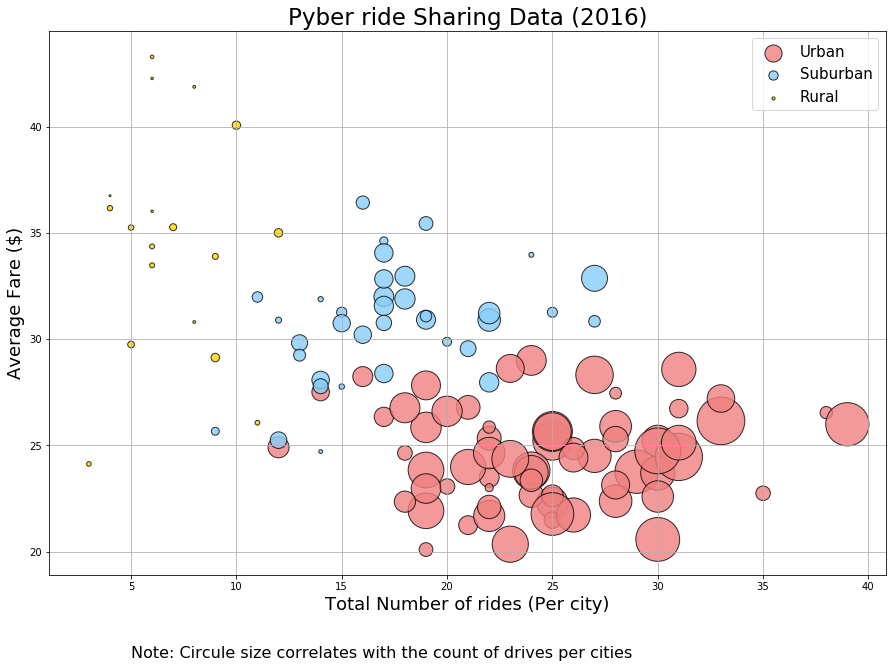

In [9]:
#Depict each dataframe by city type into one plot
plt.figure(figsize=(15, 10))

urban_plot=plt.scatter(plot_data_urban["ride_id"].values, plot_data_urban["fare"].values,\
                       s=plot_data_urban["driver_count"].values, c="lightcoral", alpha=0.8, linewidth=1,\
                       edgecolors="black", cmap=plot_data_urban["type"].values, marker="o" )

suburban_plot =plt.scatter(plot_data_suburban["ride_id"].values, plot_data_suburban["fare"].values,\
                       s=plot_data_suburban["driver_count"].values, c="lightskyblue", alpha=0.8, linewidth=1,\
                       edgecolors="black", cmap=plot_data_suburban["type"].values, marker="o" )

rural_plot =plt.scatter(plot_data_rural["ride_id"].values, plot_data_rural["fare"].values,\
                       s=plot_data_rural["driver_count"].values, c="gold", alpha=0.8, linewidth=1,\
                       edgecolors="black", cmap=plot_data_rural["type"].values, marker="o" )

plt.grid()
plt.legend((urban_plot, suburban_plot, rural_plot),
           ('Urban', 'Suburban', 'Rural'),
           scatterpoints=1,
           loc='best',
           ncol=1,
           fontsize=15, markerscale=.5 )


plt.title("Pyber ride Sharing Data (2016)", fontsize=23)
plt.xlabel("Total Number of rides (Per city)", fontsize=18)
plt.ylabel("Average Fare ($)", fontsize=18)
plt.text(5, 15, "Note: Circule size correlates with the count of drives per cities", fontsize=16)

plt.savefig("../images/Pyber_ride_sharing_data.png")

plt.show()




## Total Fares by City Type

In [11]:
# Prepare the data to plot. In this case the sum of the all the fares by city type
info_per_type = dataset.groupby(['type'])
info_per_type_sum = info_per_type.sum()
fares = [info_per_type_sum.loc["Urban","fare"], info_per_type_sum.loc["Suburban","fare"],\
         info_per_type_sum.loc["Rural","fare"]]


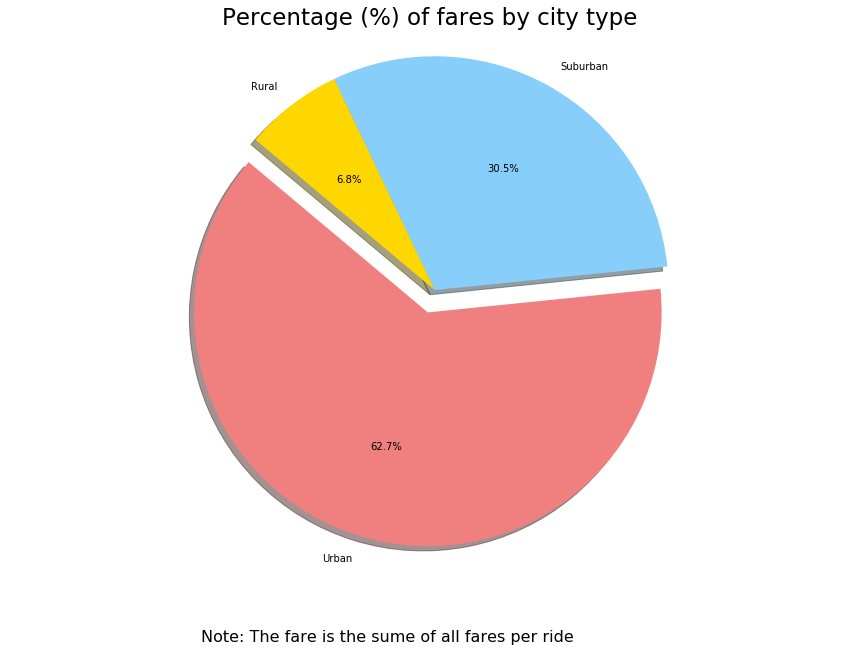

In [12]:
# Define the labels and colors for the Pie Chart
types = ["Urban", "Suburban", "Rural"]
colors = ["lightcoral","lightskyblue","gold"]
explode = (0.1,0,0)

# Pie Chart
plt.figure(figsize=(15, 10))

plt.pie(fares, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Add the required information to understand the results of the Pie Chart
plt.axis("equal")
plt.title("Percentage (%) of fares by city type", fontsize=23)
plt.text(-1, -1.5, "Note: The fare is the sume of all fares per ride", fontsize=16)

# Plot and save
plt.savefig("../images/Percentege_fares_by_citytype.png")
plt.show()

## Total Rides by City Type

In [13]:
# Prepare the data to plot. In this case the variable "info_per_type_sum" is used again but 
#to sum the number of ride_id
info_per_type_count = info_per_type.count()
rides = [info_per_type_count.loc["Urban","ride_id"], info_per_type_count.loc["Suburban","ride_id"],\
         info_per_type_count.loc["Rural","ride_id"]]


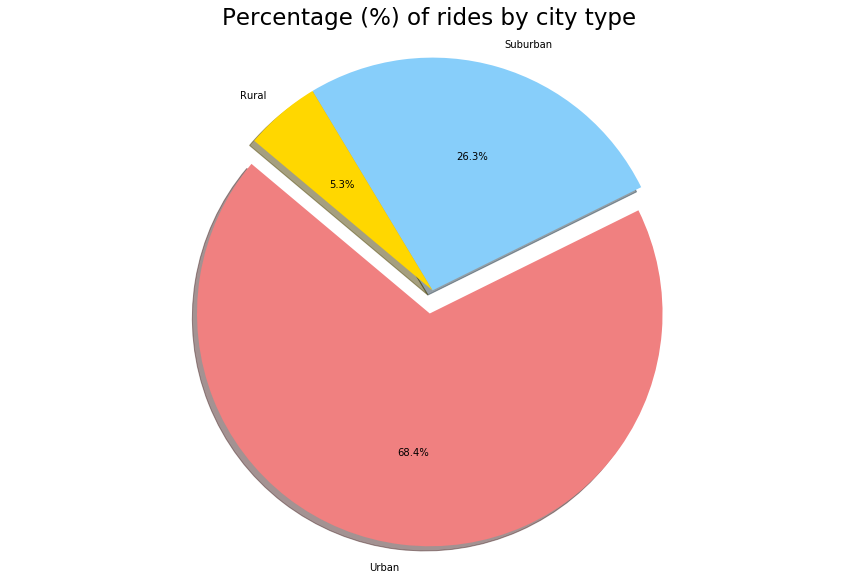

In [14]:
# Build Pie Chart using the same labels, colors and explote parameters from previous Pie Chart
plt.figure(figsize=(15, 10))

plt.pie(rides, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.title("Percentage (%) of rides by city type", fontsize=23)

plt.savefig("../images/Percentege_rides_by_citytype.png")
plt.show()


## Total Drivers by City Type

In [15]:
# Prepare the data to plot. In this case the count of the all the rides by city type
drivers = [info_per_type_sum.loc["Urban","driver_count"], info_per_type_sum.loc["Suburban","driver_count"],\
           info_per_type_sum.loc["Rural","driver_count"]]


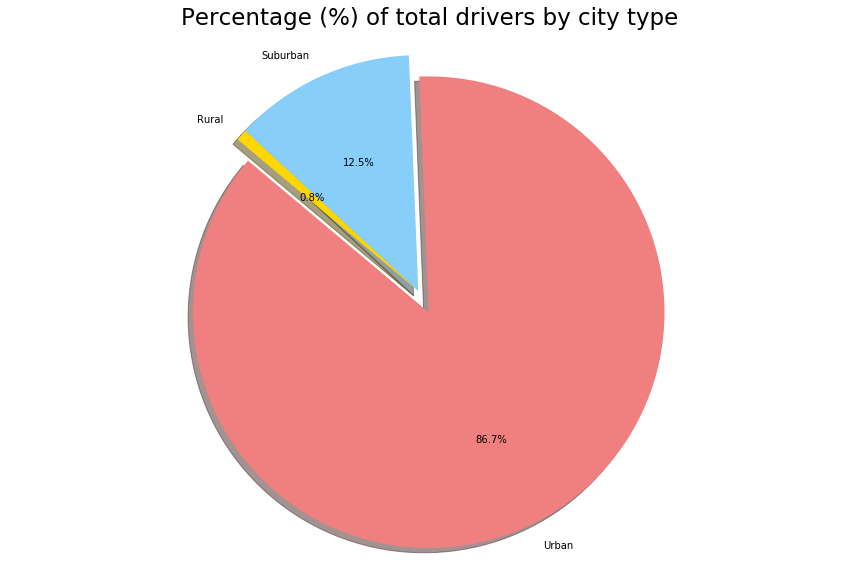

In [16]:
# Build Pie Chart using the same labels, colors and explote parameters from previous Pie Chart
plt.figure(figsize=(15, 10))

plt.pie(drivers, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)


plt.axis("equal")
plt.title("Percentage (%) of total drivers by city type", fontsize=23)

plt.savefig("../images/Percentege_drivers_by_citytype.png")
plt.show()